In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Arguments
# - utility: an np.array where utility[a] is the utility of answer a
# - epsilon > 0: the privacy parameter
# - We can assume the utility is bounded (we can actually test this by looking at its min and max)
# we can re-use this function for any fixed u(., q, x) where only a varies
# Returns
# - a random answer with probability proportional to exp(epsilon u(a, q, x) / 2 sensitivity(u(., q, x))
def exponential_mechanism(utility, epsilon, sensitivity):
    # first, define the probability of every answer.
    probability = np.exp(epsilon * utility / (2 * sensitivity))
    # we want sum_a probability[a] = 1
    probability /= np.sum(probability)
    # we want to sample from this distribution 
    # we can use np.random.choice
    return np.random.choice(len(utility), p = probability)

def epsilon_greedy_mechanism(utility, epsilon):
    # this is the wrong implementation!
    if (np.random.uniform()<epsilon):
        return np.argmax(utility)
    else:
        return np.random.choice(len(utility))

    

In [5]:
def calculate_expected_value(utility, epsilon, n_samples, sensitivity):
    value = 0
    for i in range(n_samples):
        a = exponential_mechanism(utility, epsilon, sensitivity)
        value += utility[a]
    return value / n_samples

[-0.50952109 -0.48911292 -0.46870476 -0.4482966  -0.42788843 -0.40748027
 -0.38707211 -0.36666394 -0.34625578 -0.32584762 -0.30543945 -0.28503129
 -0.26462313 -0.24421496 -0.2238068  -0.20339864 -0.18299047 -0.16258231
 -0.14217415 -0.12176598 -0.10135782 -0.08094966 -0.06054149 -0.04013333
 -0.01972517  0.00068299  0.02109116  0.04149932  0.06190748  0.08231565
  0.10272381  0.12313197  0.14354014  0.1639483   0.18435646  0.20476463
  0.22517279  0.24558095  0.26598912  0.28639728  0.30680544  0.32721361
  0.34762177  0.36802993  0.3884381   0.40884626  0.42925442  0.44966259
  0.47007075  0.49047891]
The maximum utility is -0.0006829948228602722


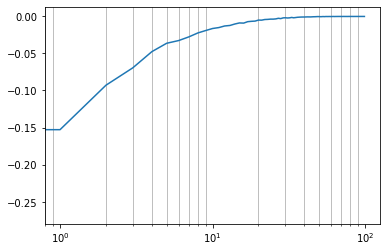

In [9]:
# now we test the exponential mechanism

# create a simple utility vector
population_size = 1000
data = np.random.uniform(size=population_size)
true_mean = np.mean(data)
sensitivity = 1 / population_size
answers = np.linspace(0,1)
print(answers - true_mean)
utility = - np.abs(true_mean - answers)
print("The maximum utility is", np.max(utility))

# values of epsilon to try
epsilon_range  = np.linspace(0,1,100)
n_samples = 1000
exp_utility = [calculate_expected_value(utility, epsilon, n_samples, sensitivity) for epsilon in epsilon_range]

plt.semilogx(exp_utility)
plt.semilogx(np.max(utility))
plt.grid(which='minor')

In [ ]:
sum(np.exp(utility))/sum(np.exp(utility))

In [ ]:
help(np.random.choice)

In [ ]:
np.max(utility) - np.mean(utility)

In [ ]:
utility

In [ ]:
# Here you can se that as we increase epsilon, the probability of the best answer increases and the worst ones decrease
epsilon = 0;plt.plot(np.exp(epsilon * utility)/ sum(np.exp(epsilon * utility))) # here it is uniform!
epsilon = 0.1;plt.plot(np.exp(epsilon * utility)/ sum(np.exp(epsilon * utility)))
epsilon = 1;plt.plot(np.exp(epsilon * utility)/ sum(np.exp(epsilon * utility)))
epsilon = 100;plt.plot(np.exp(epsilon * utility)/ sum(np.exp(epsilon * utility)))
